# Making multiple HTTP requests using Python
### (Synchronious, Multiprocessing, Multithreading, asyncio)

Let's say we've to make 100 http requests using python. We trying to find the fastest way to achieve it.

# Synchronous
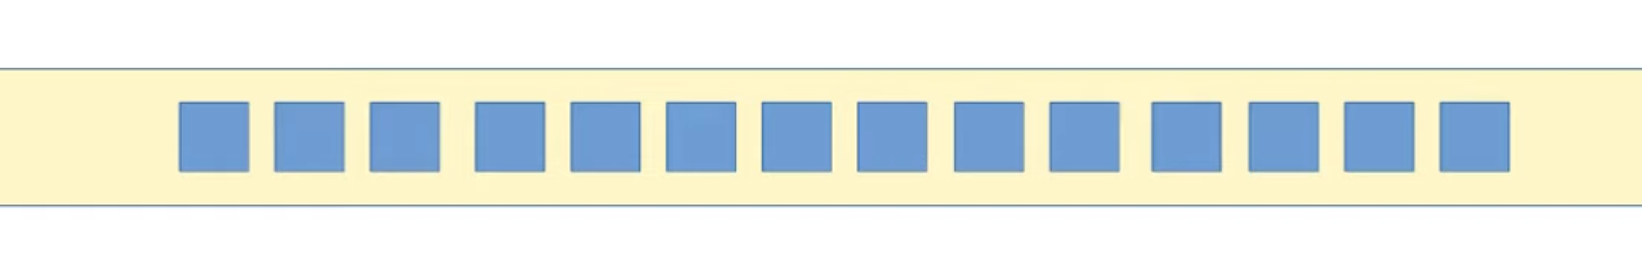

In [4]:
# timer module

import timeit

def exctimer(number, repeat):
    def wrapper(func):
        runs = timeit.repeat(func, number=number, repeat=repeat)
        print("\nTOTAL TIME: ", sum(runs) / len(runs))
    return wrapper

In [5]:
# We'll take a sample URL (everytime you make a request to this API, it will return a unique UUID)
# PS: package required "requests"

BASE_URL = "https://httpbin.org/uuid"

In [18]:
import requests

def fetch(session, url):
    with session.get(url) as response:
        print(response.json()["uuid"])
        
@exctimer(1, 1)
def main():
    with requests.Session() as session:
        for _ in range(100):
            fetch(session, BASE_URL)

1d4349e6-b92a-47b0-90dd-dbcabf15168c
35af377f-fbe3-4309-8710-c891ae22f15d
f19ba5b7-03e7-4f86-b024-b208ff08afb7
b335936d-2e99-457f-8c5a-da5de79a20d7
3ecb2abb-a21d-45e8-a4f0-3553357a838d
7e4baf25-6640-4854-bcfb-8e423958e7f2
97387225-32d5-4bc3-becf-69ced3868c8e
1e2e0941-317f-4204-af31-74ab33bc70ec
dd1ed3f8-bceb-4cdc-806f-580c59070530
b2545fdd-eb19-44ae-8923-51babb04cad6
2f449c4b-c0f0-4757-8f9a-67ccb9656d2d
cd2007b5-975f-4092-a620-afcb23081492
84d48b91-a42e-4fe4-8505-8a9e3ad3fa55
4de25810-8f9c-4388-bb58-9918de1dbc1b
b6c7b100-3dd4-46d1-bdbb-982456c9ee7e
02cbf71a-f871-497a-bd4d-21130a0f596d
67561170-db41-4dc9-afe4-90d11e01bf09
a4db849e-d1c6-492c-959e-035c76093704
dfc142c3-813b-4392-bf1e-3a177db14886
7622beec-b720-4d57-b53b-fac546840429
71c1bc60-3645-46a9-b4f8-dc66f7d1c0f5
93ef032c-5f4d-48d8-a9b1-a1b0f1ac86c5
86be63e1-ead7-43d1-9d4d-a0ad0cf81761
924bbd86-9648-4cf3-a9c7-4ab98ac2c118
81a81544-6d17-4dda-973e-8e2a7d2b1e2b
2d9ae834-e7ff-4c49-844c-98435a15e7f3
f56704c6-2d9c-4549-8c49-ffacbd3e0fe5
0

As we saw above, with synchronous approach, to fetch around 100 http calls it took around 60 seconds.
Defninitly, we can do better, this is not the best approach we have.

# Multiprocessing

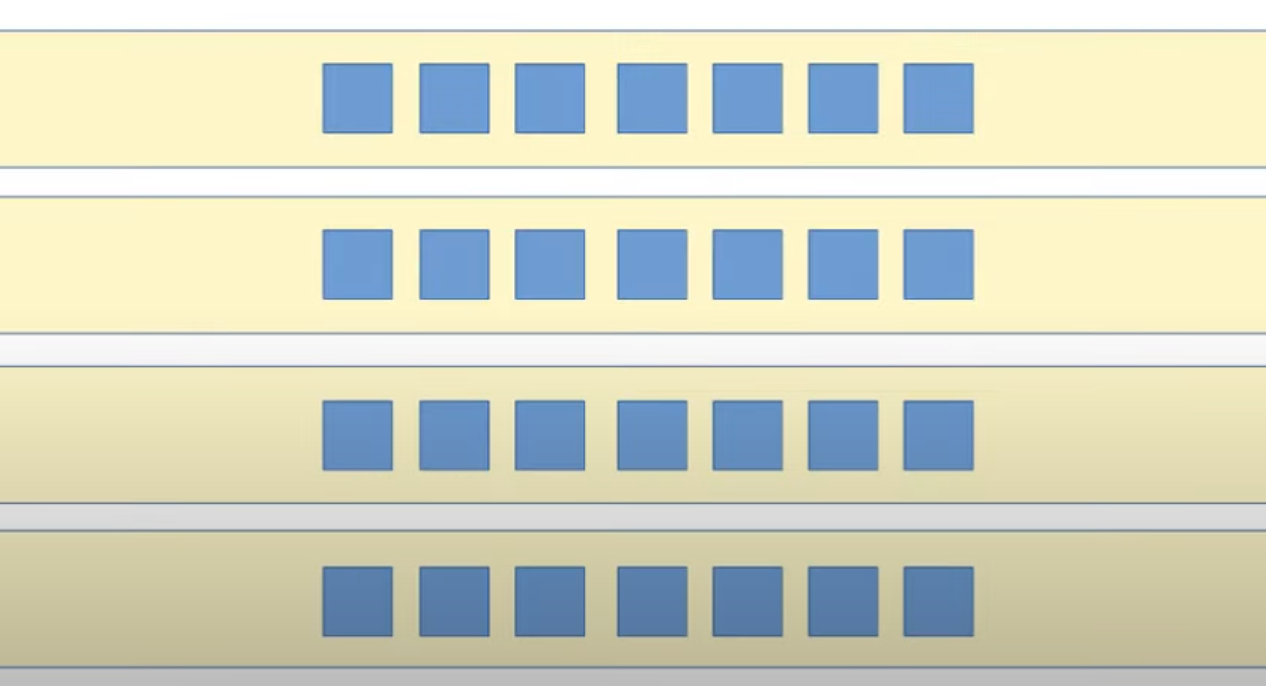

Now, we'll see how we can achive the same through multiprocessing. As we have seen in our multiprocessing notes before, how we can leverage Pool to execute things parallely where you don't have to bother about sync n all.
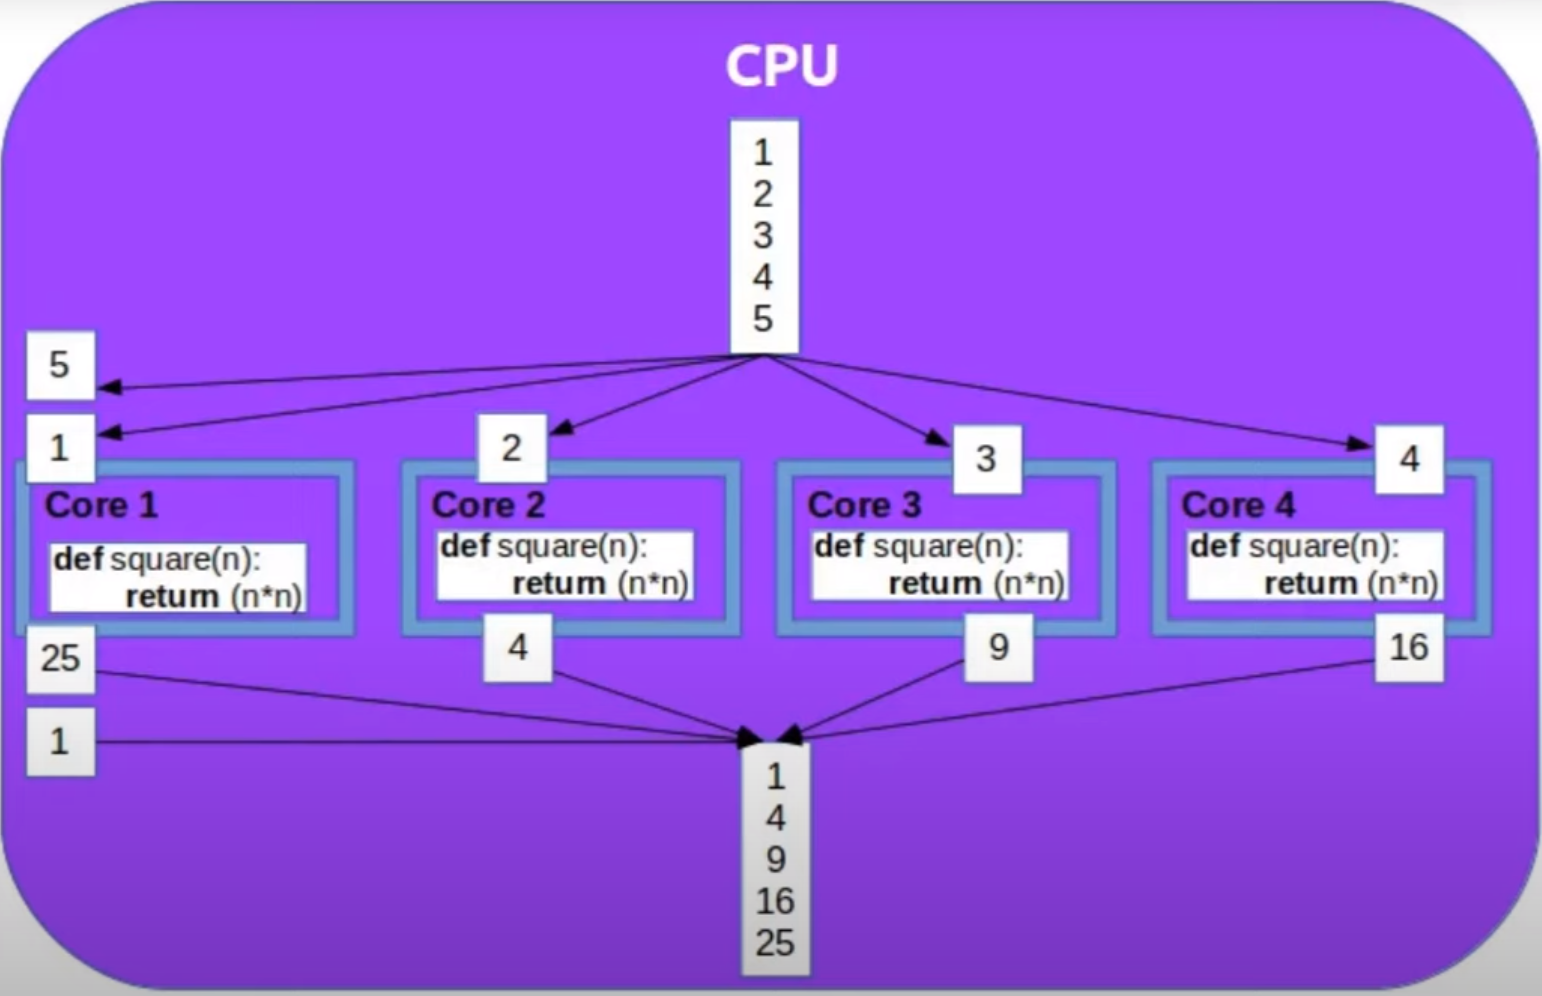

In [6]:
import requests
from multiprocessing import Pool

def fetch(session, url):
    with session.get(url) as response:
        print(response.json()["uuid"])

@exctimer(1, 1)
def main():
    with Pool() as pool:
        with requests.Session() as session:
            pool.starmap(fetch, [(session, BASE_URL) for _ in range(100)])

8f0834aa-1254-4226-b738-066e0bd2d7a59b2c24d2-45d3-4ddf-83e6-76ec61e753be6f8d56aa-178d-4d2a-a29f-70f0424faa6ec1f9fcc3-70da-42ea-8a85-3e81a52c702c40133915-2508-4c14-a5cc-5d69953e81ad0b0da79b-149b-4a99-9404-391ce0e3166cb48e4ec3-419d-435d-a636-4594699853dda1719485-5d58-4060-b7d3-3eb3d3a4a9b0a579b7f6-15b4-4144-b86b-b2ab04958867








4a74ee29-5611-4629-ae1b-2a347a79669d
4c2b4a4f-7dad-4054-aa2d-7c6827a256ad195f9602-5495-4d9d-abf2-76a8ed194e57

9a918a0c-90f5-4db6-9c94-10b6aba313aa5ab1201f-a708-4244-9cf9-972dc3ee2c85783a1dbc-3bb6-4fb0-963a-7d7f35bc14eee980ab02-a811-49c9-b790-a70f6a7a38ac5f5ca7d8-c9b0-47c2-b02b-43578952b235b5008ceb-29d6-459f-9b12-f36bfd67c39b190aed5b-66c2-40f0-ba20-04aa7865b4d7






314a721d-f6fa-405b-af7a-5fce004dd04d
90932225-7d66-4066-a260-b856d6dd9393
f71463c3-559e-4480-9051-1021e5bd21f7
87eb131d-2dc9-45ef-88f5-dc99104c5ba5
9f734adc-e2aa-418d-9992-bcbdf29dbc8a
2ce5ece4-d55b-4881-85b7-a2770d70e408
d5ace72c-484b-448e-bc5e-0dc3286946de16ea5895-1d33-4b67-9b22-b38513b6715b

3

As we can see in the example above, using multiprocessing Pool() we are able to achieve the same result in under 10 seconds.

# Multithreading

Now, we'll try to implement the same thing using multithreading
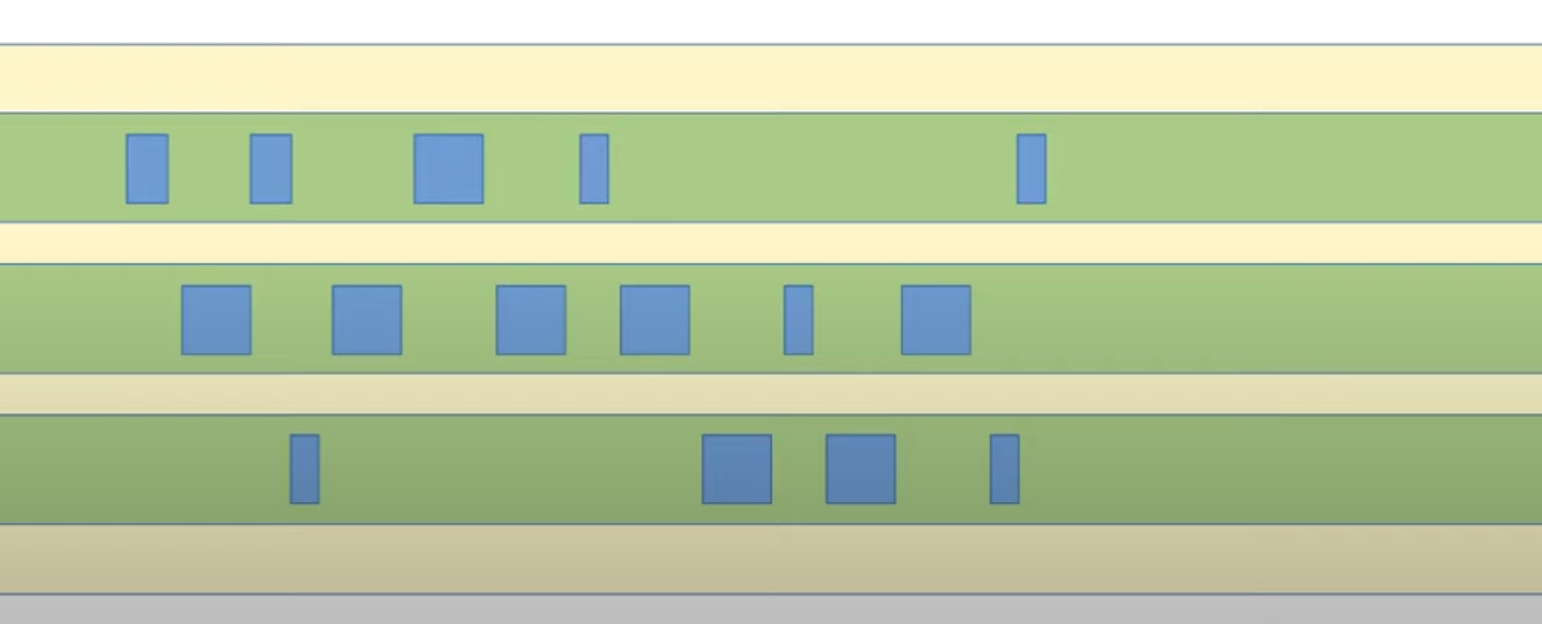

- Threads are lightweight as compared to processes, it is just a segment of a process so we can create multiple threads to run our tasks
- BUT, there is catch in python, we can't parallelize the execution of thread in python in case of multithreading because of the GIL (Global Interpreter Lock). Which allows only one thread to execute at a time by the python interpreter. 
- We can still run our task fast due to fast context switching.

In [10]:
import requests
from concurrent.futures import ThreadPoolExecutor

def fetch(session, url):
    with session.get(url) as response:
        print(response.json()["uuid"])

@exctimer(1, 1)
def main():
    with ThreadPoolExecutor(max_workers=20) as executor:
        with requests.Session() as session:
            executor.map(fetch, [session] * 100, [BASE_URL] * 100)
            executor.shutdown(wait=True) # wait until everything is completed by threads.

c1684f57-3e2a-470b-aed2-34559fd9aa8f
d71e4ad4-b289-4fab-b8a2-ee151ba7e8cf
681c301c-89a8-44c0-9e74-980938a29f01
cfa07388-1e7c-4054-b843-7e395877add5
2874cec7-5f14-4716-8d73-ccd760174de5
fde08722-fa88-4dec-9d56-3259a1cadcbe
d202fa7b-2597-46bb-b265-c96b3e1f60e3
de52deb3-80e3-4bcc-b867-c27054ae506e
1819fe44-80c8-41ee-93c1-e145cf3e0cfa
a9492405-348e-4e46-bde5-16ab7a55c84f
5a7956fc-ee36-4896-9ed1-f8fccbdc118b
b48945bc-ff9a-4727-a5bb-d0126c2ef7d9
e31971b1-d262-4691-9514-f87193ec74f5
c509e750-6d53-406d-aff8-099f63c36475
d1ab90b5-4110-4c96-9ed8-5d24dbe29214
180cf61a-ea26-48b6-b67c-cc0760411a24
7e692c92-ff3e-4e64-875b-48220808ae19
6b3a33a0-367a-498d-b8e0-9029231cec1f
dcf17f9b-e957-4836-abcf-a1d1a99b3bcc
dc939066-7dbf-4633-8882-20fd64a5a9d4
f1b3d481-5447-4c49-8bcc-6ce65744896c
7cc25176-b1af-4ab5-86f1-a1e4c558ac66
bb210e1d-07d0-49ee-bfb4-6a225b1c87e8
d49cd893-688d-4c2a-8627-e83b05ec189d
22fe2a91-ec2b-41f0-a7ea-2c949aacede6
046629aa-db37-4095-9abb-277152cf6495
9c1fb167-b213-43d1-a9da-0a5cfb558a16
d

As you can see, it took around 6 seconds to complete everything

How multithreading is faster than multiprocessing ?
- Multiprocessing is having an overhead of creating processes.
- A portion of work is still happening sequentially
- Let's say you have 4 processor, you have divided 25 requests to each processes, these 25 requests are processing sequentially.
- That's why it is not completely efficient there.
- Where as in multithreading you are spawning multiple threads and each threads are doint fast context switching which is making everything faster. 

# Asyncio

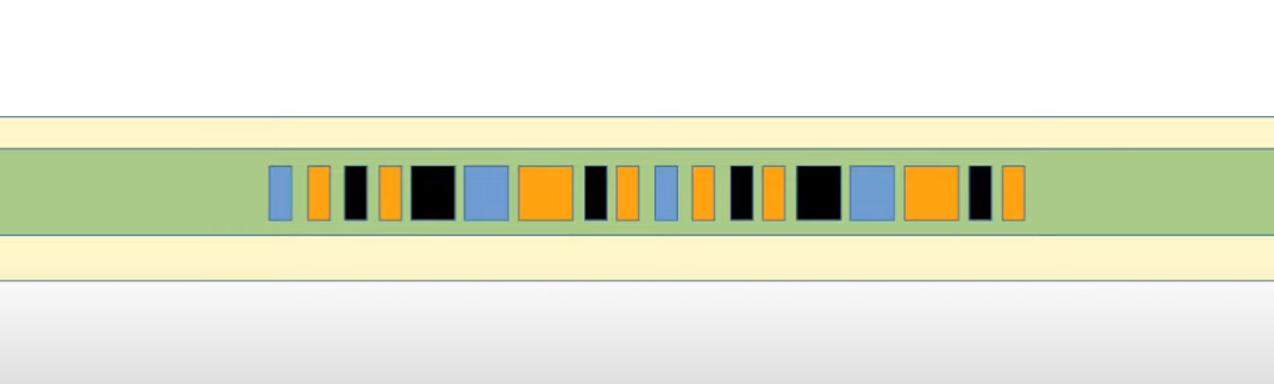

Just like multithreading, does context switching to support concurrency, but it is bit different from multithreading in two ways:
- first of all it uses a single thread.
- it is your code which decides when to leave control of the running thread so that some other portion of the code can run during the mean time.

In the example above, we have got 3 tasks: BLUE, ORANGE, BLACK
- BLUE says it will wait, the ORANGE starts executing then BLACK get ready and looking at color code, we can make sense out of it.

PS: In order to write a truly async framework, you library should also be async in nature. So, in case of requests library we'll use aiohttp

In [14]:
import aiohttp
import asyncio

In [20]:
# we'll convert our function to a co-routine, A co-routine is a specialized function which is used by asyncio

async def fetch(session, url):
    async with session.get(url) as response:
        json_response = await response.json() ## await to help you to run other functions when it is waiting
        print(json_response["uuid"])

        
# @exctimer(1, 1)
async def main():
    async with aiohttp.ClientSession() as session:
        tasks = [fetch(session, BASE_URL) for _ in range(100)]
        await asyncio.gather(*tasks) ## it allows you to gather bunch of co-routines and run them together
        
@exctimer(1, 1)
def func():
    asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

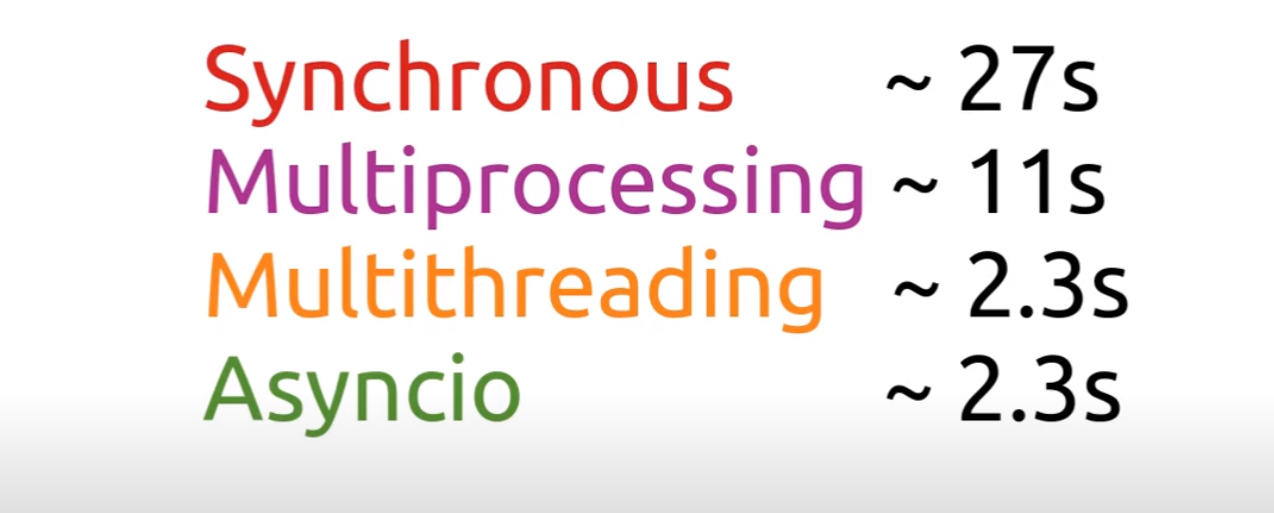